In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
curah_hujan_data = pd.read_excel("curah_hujan.xlsx")

# Menampilkan data
display(curah_hujan_data)

,Tanggal,RR
0,01-01-2023,30.5
1,02-01-2023,25.0
2,03-01-2023,21.8
3,04-01-2023,10.6
4,05-01-2023,1.9
...,...,...
3282,27-12-2015,7.0
3283,28-12-2015,48.0
3284,29-12-2015,21.6
3285,30-12-2015,33.0


In [ ]:
# Mengganti nilai 8888 dengan NaN
curah_hujan_data['RR'] = curah_hujan_data['RR'].replace(8888, np.nan)

# Menghapus baris yang mengandung NaN
curah_hujan_data = curah_hujan_data.dropna()

# Menampilkan data setelah dibersihkan
print("Data setelah dibersihkan:")
display(curah_hujan_data)

Data setelah dibersihkan:


,Tanggal,RR
0,01-01-2023,30.5
1,02-01-2023,25.0
2,03-01-2023,21.8
3,04-01-2023,10.6
4,05-01-2023,1.9
...,...,...
3282,27-12-2015,7.0
3283,28-12-2015,48.0
3284,29-12-2015,21.6
3285,30-12-2015,33.0


In [ ]:
curah_hujan_data['Tanggal'] = pd.to_datetime(curah_hujan_data['Tanggal'], format='%d-%m-%Y')
curah_hujan_data = curah_hujan_data.sort_values('Tanggal')
curah_hujan_data.set_index('Tanggal', inplace=True)

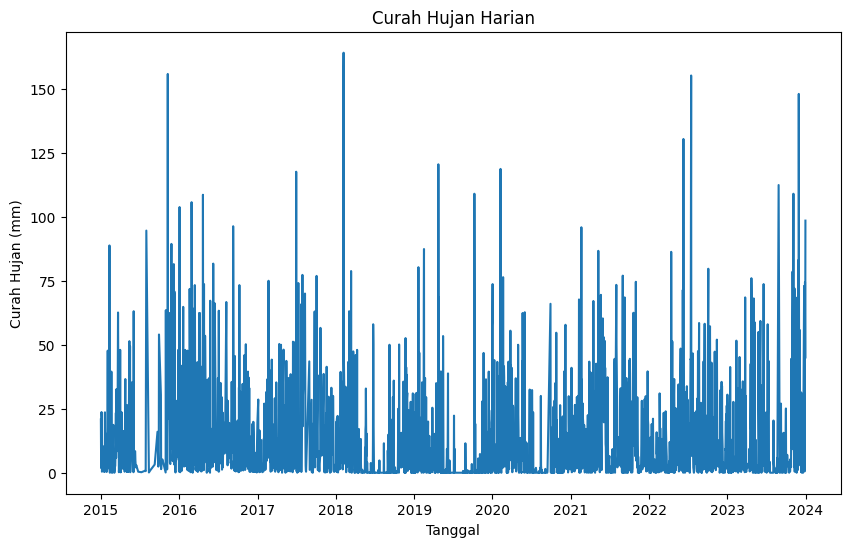

In [ ]:
# 4. Visualisasi data untuk analisis
plt.figure(figsize=(10, 6))
plt.plot(curah_hujan_data['RR'])
plt.title('Curah Hujan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.show()

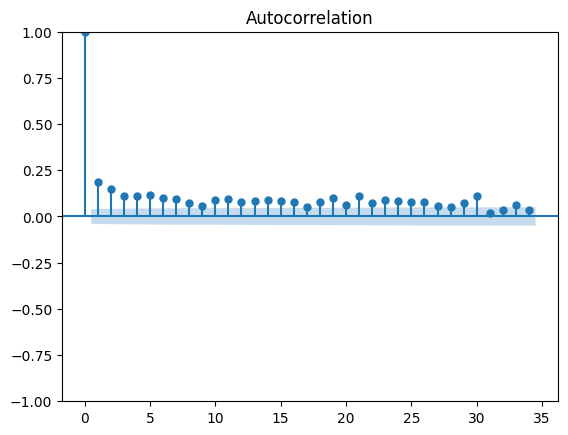

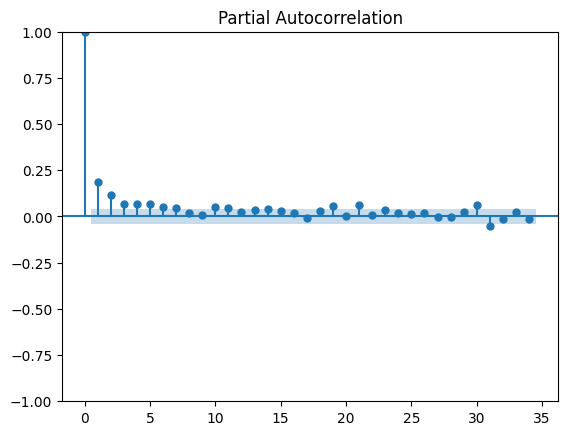

In [ ]:
# 5. Tentukan parameter ARIMA dengan ACF dan PACF
plot_acf(curah_hujan_data['RR'])
plot_pacf(curah_hujan_data['RR'])
plt.show()

#  Sarima Dengan Normalisasi

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (Normalized): 0.049859736642561936
Mean Absolute Error (Normalized): 0.14520245276584823
Root Mean Square Error (Normalized): 0.2232929390790536


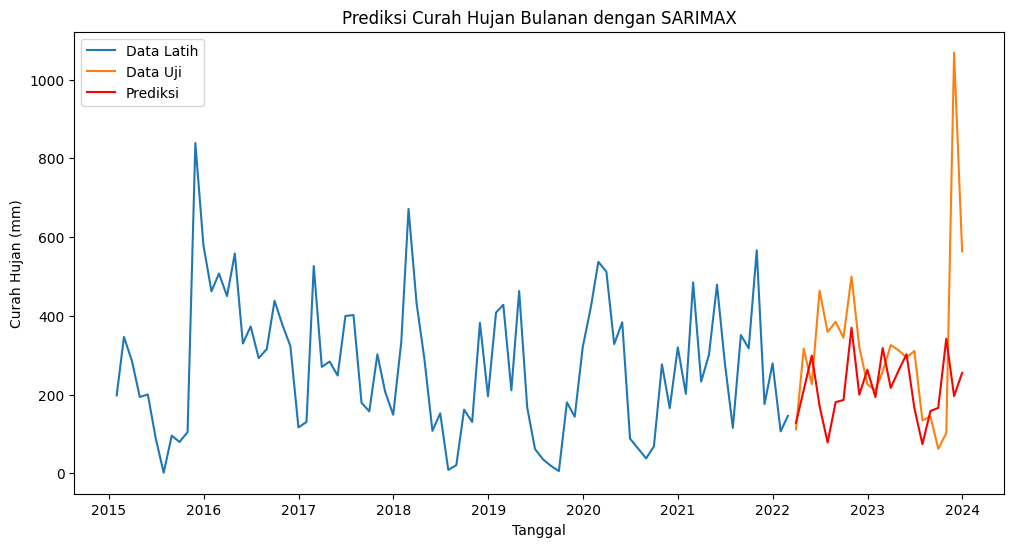

Prediksi Curah Hujan Bulanan untuk 2 Tahun ke Depan:
              forecast
2024-01-31  128.120871
2024-02-29  211.683119
2024-03-31  299.037440
2024-04-30  170.971983
2024-05-31   78.475265
2024-06-30  180.942849
2024-07-31  186.127077
2024-08-31  369.710077
2024-09-30  199.758384
2024-10-31  263.157948
2024-11-30  193.593069
2024-12-31  318.115244
2025-01-31  216.971516
2025-02-28  260.573440
2025-03-31  302.392429
2025-04-30  165.887626
2025-05-31   74.073208
2025-06-30  158.295931
2025-07-31  166.262495
2025-08-31  341.840210
2025-09-30  196.137514
2025-10-31  254.951736
2025-11-30  196.788634
2025-12-31  330.787167


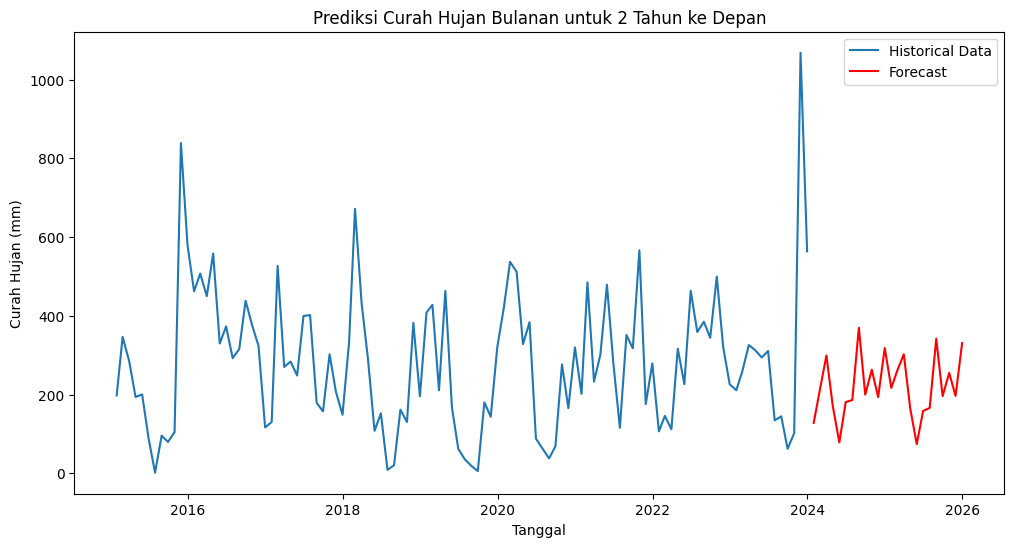

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Muat data
curah_hujan_data = pd.read_excel("curah_hujan.xlsx")

# Preproses
curah_hujan_data['RR'] = curah_hujan_data['RR'].replace(8888, np.nan)
curah_hujan_data = curah_hujan_data.dropna()

curah_hujan_data['Tanggal'] = pd.to_datetime(curah_hujan_data['Tanggal'], format='%d-%m-%Y')
curah_hujan_data = curah_hujan_data.sort_values('Tanggal')
curah_hujan_data.set_index('Tanggal', inplace=True)

# Agregasi data menjadi bulanan
Curah_hujan_bulanan = curah_hujan_data['RR'].resample('M').sum()

# Normalisasi data
scaler = MinMaxScaler()
Curah_hujan_bulanan_normalized = scaler.fit_transform(Curah_hujan_bulanan.values.reshape(-1, 1))
Curah_hujan_bulanan_normalized = pd.Series(Curah_hujan_bulanan_normalized.flatten(), index=Curah_hujan_bulanan.index)

# Pecah data menjadi training dan testing
data_latih = int(len(Curah_hujan_bulanan_normalized) * 0.8)
train, test = Curah_hujan_bulanan_normalized[:data_latih], Curah_hujan_bulanan_normalized[data_latih:]

# Latih model SARIMAX (Seasonal ARIMA)
model = SARIMAX(train, order=(1, 1, 3), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Prediksi pada data testing
Prediksi_normalized = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluasi model pada data yang telah dinormalisasi
mse_normalized = mean_squared_error(test, Prediksi_normalized)
mae_normalized = mean_absolute_error(test, Prediksi_normalized)
rmse_normalized = np.sqrt(mse_normalized)
print(f'Mean Squared Error (Normalized): {mse_normalized}')
print(f'Mean Absolute Error (Normalized): {mae_normalized}')
print(f'Root Mean Square Error (Normalized): {rmse_normalized}')

# Inverse transform prediksi dan data uji untuk mendapatkan nilai asli
Prediksi = scaler.inverse_transform(Prediksi_normalized.values.reshape(-1, 1)).flatten()
test_actual = scaler.inverse_transform(test.values.reshape(-1, 1)).flatten()

# Visualisasikan hasil prediksi vs data uji
plt.figure(figsize=(12, 6))
plt.plot(Curah_hujan_bulanan.index[:data_latih], scaler.inverse_transform(train.values.reshape(-1, 1)), label='Data Latih')
plt.plot(Curah_hujan_bulanan.index[data_latih:], test_actual, label='Data Uji')
plt.plot(Curah_hujan_bulanan.index[data_latih:], Prediksi, label='Prediksi', color='red')
plt.title('Prediksi Curah Hujan Bulanan dengan SARIMAX')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.legend()
plt.show()

# Prediksi 2 tahun ke depan
Jumlah_prediksi = 24
forecast_normalized = model_fit.get_forecast(steps=Jumlah_prediksi)
prediksi_df_normalized = forecast_normalized.predicted_mean

forecast_dates = pd.date_range(start=Curah_hujan_bulanan.index[-1], periods=Jumlah_prediksi + 1, freq='M')[1:]
prediksi_df = scaler.inverse_transform(prediksi_df_normalized.values.reshape(-1, 1)).flatten()
prediksi_df = pd.DataFrame(prediksi_df, index=forecast_dates, columns=['forecast'])

print("Prediksi Curah Hujan Bulanan untuk 2 Tahun ke Depan:")
print(prediksi_df)

# Visualisasikan prediksi masa depan
plt.figure(figsize=(12, 6))
plt.plot(Curah_hujan_bulanan.index, scaler.inverse_transform(Curah_hujan_bulanan_normalized.values.reshape(-1, 1)), label='Historical Data')
plt.plot(prediksi_df.index, prediksi_df['forecast'], label='Forecast', color='red')
plt.title('Prediksi Curah Hujan Bulanan untuk 2 Tahun ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.legend()
plt.show()


Mean Squared Error (Normalized): 0.02364575004063437
Mean Absolute Error (Normalized): 0.08971085207430843
Root Mean Square Error (Normalized): 0.1537717465616957


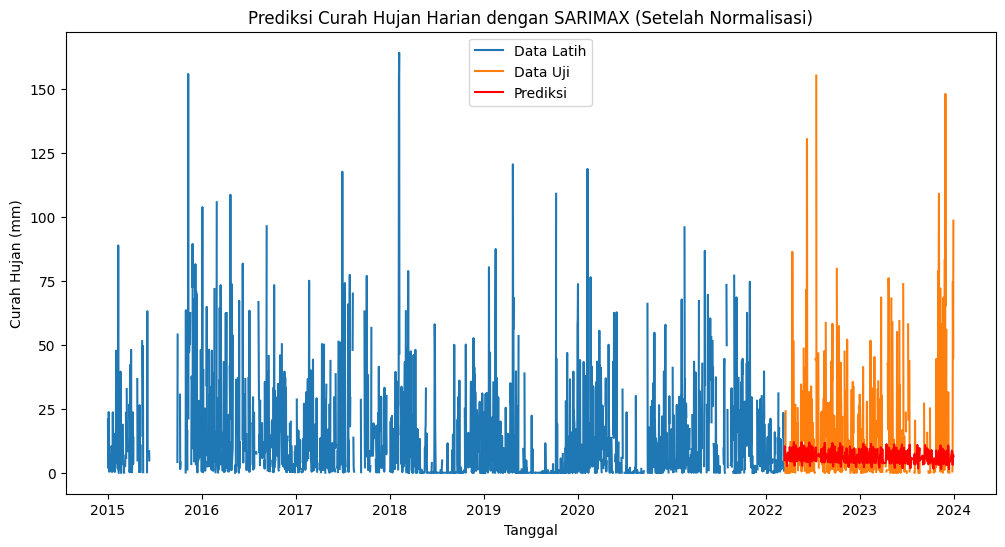

Prediksi Curah Hujan Harian untuk 2 Tahun ke Depan:
             forecast
2024-01-01   5.077674
2024-01-02   4.960160
2024-01-03  10.369983
2024-01-04   6.665856
2024-01-05   4.828889
...               ...
2025-12-26   5.139502
2025-12-27   2.762456
2025-12-28  10.395498
2025-12-29   5.351272
2025-12-30   1.222367

[730 rows x 1 columns]


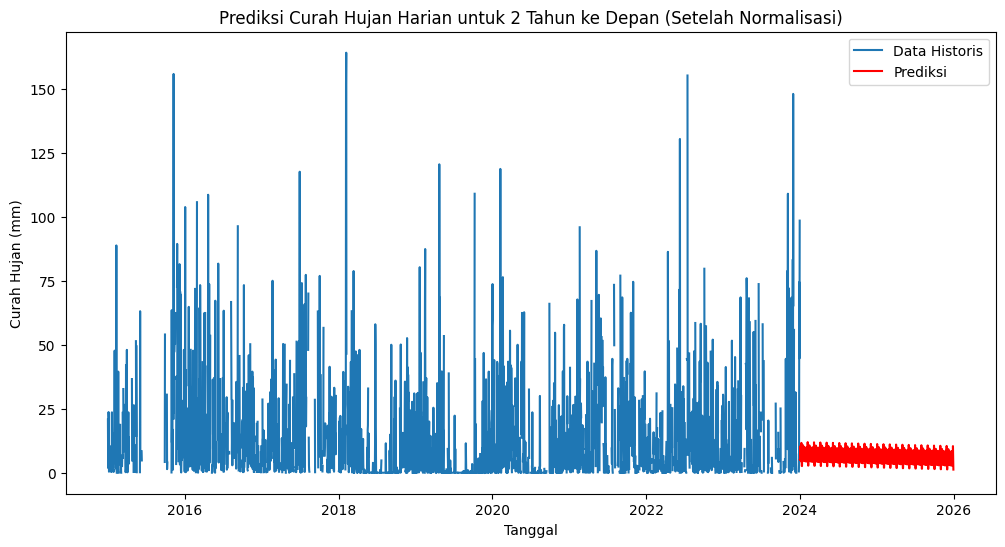

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Muat data
curah_hujan_data = pd.read_excel("curah_hujan.xlsx")

# Bersihkan data
curah_hujan_data['RR'] = curah_hujan_data['RR'].replace(8888, np.nan)
curah_hujan_data = curah_hujan_data.dropna()

# Atur kolom tanggal sebagai indeks dan urutkan data berdasarkan tanggal
curah_hujan_data['Tanggal'] = pd.to_datetime(curah_hujan_data['Tanggal'], format='%d-%m-%Y')
curah_hujan_data = curah_hujan_data.sort_values('Tanggal')
curah_hujan_data.set_index('Tanggal', inplace=True)

# Tetapkan frekuensi indeks ke harian
curah_hujan_data = curah_hujan_data.asfreq('D')

# Normalisasi data menggunakan Min-Max Scaling
scaler = MinMaxScaler()
curah_hujan_data['RR'] = scaler.fit_transform(curah_hujan_data[['RR']])

# Pecah data menjadi training dan testing
train_size = int(len(curah_hujan_data) * 0.8)
train, test = curah_hujan_data[:train_size], curah_hujan_data[train_size:]

# Latih model SARIMAX (Seasonal ARIMA) dengan parameter musiman yang sesuai
model = SARIMAX(train['RR'], order=(1, 1, 3), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit(disp=False)

# Prediksi pada data testing
predictions_normalized = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluasi model pada data yang telah dinormalisasi
test_cleaned = test.dropna()
predictions_cleaned = predictions_normalized.loc[test_cleaned.index]

# Metrik Uji
mse_normalized = mean_squared_error(test_cleaned['RR'], predictions_cleaned)
mae_normalized = mean_absolute_error(test_cleaned['RR'], predictions_cleaned)
rmse_normalized = np.sqrt(mse_normalized)
print(f'Mean Squared Error (Normalized): {mse_normalized}')
print(f'Mean Absolute Error (Normalized): {mae_normalized}')
print(f'Root Mean Square Error (Normalized): {rmse_normalized}')

# Inverse transform prediksi dan data uji untuk mendapatkan nilai asli
predictions = scaler.inverse_transform(predictions_cleaned.values.reshape(-1, 1)).flatten()
test_actual = scaler.inverse_transform(test_cleaned['RR'].values.reshape(-1, 1)).flatten()


# Visualisasikan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(train.index, scaler.inverse_transform(train['RR'].values.reshape(-1, 1)), label='Data Latih')
plt.plot(test.index, scaler.inverse_transform(test['RR'].values.reshape(-1, 1)), label='Data Uji')
plt.plot(test_cleaned.index, predictions, label='Prediksi', color='red')
plt.title('Prediksi Curah Hujan Harian dengan SARIMAX (Setelah Normalisasi)')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.legend()
plt.show()

# Prediksi 2 tahun ke depan
langkah_prediksi = 730
Prediksi_normalized = model_fit.get_forecast(steps=langkah_prediksi)
Prediksi_df_normalized = Prediksi_normalized.predicted_mean

Prediksi_dates = pd.date_range(start=curah_hujan_data.index[-1], periods=langkah_prediksi + 1, freq='D')[1:]
Prediksi_df = scaler.inverse_transform(Prediksi_df_normalized.values.reshape(-1, 1)).flatten()
Prediksi_df = pd.DataFrame(Prediksi_df, index=Prediksi_dates, columns=['forecast'])

print("Prediksi Curah Hujan Harian untuk 2 Tahun ke Depan:")
print(Prediksi_df)

# Visualisasikan prediksi masa depan
plt.figure(figsize=(12, 6))
plt.plot(curah_hujan_data.index, scaler.inverse_transform(curah_hujan_data['RR'].values.reshape(-1, 1)), label='Data Historis')
plt.plot(Prediksi_df.index, forecast_df['forecast'], label='Prediksi', color='red')
plt.title('Prediksi Curah Hujan Harian untuk 2 Tahun ke Depan (Setelah Normalisasi)')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.legend()
plt.show()
